# Fly’s Eye Energetic Particle Spectrometer (FEEPS)
author: Louis Richard


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from pyrfu import mms
from pyrfu.plot import plot_line, plot_spectr

Load IGRF coefficients ...


## Define data path, time interval and spacecraft index

In [2]:
mms.db_init(default="local", local="/data/mms")
tint_long = ["2017-07-23T16:10:00", "2017-07-23T18:10:00"]
mms_id = 2

[21-Mar-25 11:28:03] INFO: Updating MMS data access configuration in /homelocal/apostolosk/envs/mms_projects/lib/python3.12/site-packages/pyrfu/mms/config.json...
[21-Mar-25 11:28:03] INFO: Updating MMS SDC credentials in /homelocal/apostolosk/.config/python_keyring...


## Load data

### Magnetic field in GSM

In [3]:
b_bcs = mms.get_data("b_bcs_fgm_srvy_l2", tint_long, mms_id)
b_gsm = mms.get_data("b_gsm_fgm_srvy_l2", tint_long, mms_id)

[21-Mar-25 11:28:04] INFO: Loading mms2_fgm_b_bcs_srvy_l2...
[21-Mar-25 11:28:05] INFO: Loading mms2_fgm_b_gsm_srvy_l2...


### Electron and ion differential particle flux for all FEEPS sensors

In [4]:
# Electron
dpf_feeps_alle_e = mms.get_feeps_alleyes("fluxe_srvy_l2", tint_long, mms_id)

# Ion
dpf_feeps_alle_i = mms.get_feeps_alleyes("fluxi_srvy_l2", tint_long, mms_id)

[21-Mar-25 11:28:06] INFO: Loading mms2_epd_feeps_srvy_l2_electron_spinsectnum...
[21-Mar-25 11:28:09] INFO: Loading mms2_epd_feeps_srvy_l2_electron_pitch_angle...
[21-Mar-25 11:28:09] INFO: Loading mms2_epd_feeps_srvy_l2_electron_top_intensity_sensorid_3...
[21-Mar-25 11:28:09] INFO: Loading mms2_epd_feeps_srvy_l2_electron_top_intensity_sensorid_4...
[21-Mar-25 11:28:09] INFO: Loading mms2_epd_feeps_srvy_l2_electron_top_intensity_sensorid_5...
[21-Mar-25 11:28:10] INFO: Loading mms2_epd_feeps_srvy_l2_electron_top_intensity_sensorid_11...
[21-Mar-25 11:28:10] INFO: Loading mms2_epd_feeps_srvy_l2_electron_top_intensity_sensorid_12...
[21-Mar-25 11:28:10] INFO: Loading mms2_epd_feeps_srvy_l2_electron_bottom_intensity_sensorid_3...
[21-Mar-25 11:28:10] INFO: Loading mms2_epd_feeps_srvy_l2_electron_bottom_intensity_sensorid_4...
[21-Mar-25 11:28:10] INFO: Loading mms2_epd_feeps_srvy_l2_electron_bottom_intensity_sensorid_5...
[21-Mar-25 11:28:11] INFO: Loading mms2_epd_feeps_srvy_l2_electro

## Post-processing

### Correct energy table

In [5]:
# Electron
dpf_feeps_alle_e = mms.feeps_correct_energies(dpf_feeps_alle_e)

# Ion
dpf_feeps_alle_i = mms.feeps_correct_energies(dpf_feeps_alle_i)

### Apply flat field correction to electron and ion differential particle flux spectra

In [6]:
# Electron
dpf_feeps_alle_e = mms.feeps_flat_field_corrections(dpf_feeps_alle_e)

# Ion
dpf_feeps_alle_i = mms.feeps_flat_field_corrections(dpf_feeps_alle_i)

### Remove bad data

In [7]:
# Electron
dpf_feeps_alle_e = mms.feeps_remove_bad_data(dpf_feeps_alle_e)

# Ion
dpf_feeps_alle_i = mms.feeps_remove_bad_data(dpf_feeps_alle_i)

### Split the last integral channel from the electron and ion differential particle flux spectra

In [8]:
# Electron
dpf_feeps_alle_e_clean, dpf_feeps_alle_e_500kev = mms.feeps_split_integral_ch(
    dpf_feeps_alle_e
)

# Ion
dpf_feeps_alle_i_clean, dpf_feeps_alle_i_500kev = mms.feeps_split_integral_ch(
    dpf_feeps_alle_i
)

### Remove sunlight contamination

In [9]:
# Electron
dpf_feeps_alle_e_clean_sun_removed = mms.feeps_remove_sun(dpf_feeps_alle_e_clean)

# Ion
dpf_feeps_alle_i_clean_sun_removed = mms.feeps_remove_sun(dpf_feeps_alle_i_clean)

### Compute the electron and ion omni-directional flux for all 24 sensors

In [10]:
# Electron
dpf_feeps_omni_e = mms.feeps_omni(dpf_feeps_alle_e_clean_sun_removed)

# Ion
dpf_feeps_omni_i = mms.feeps_omni(dpf_feeps_alle_i_clean_sun_removed)

### Creates sector-spectrograms with FEEPS data

In [11]:
# Electron
dpf_feeps_alle_ss_e_clean_sun_removed = mms.feeps_sector_spec(
    dpf_feeps_alle_e_clean_sun_removed
)

# Ion
dpf_feeps_alle_ss_i_clean_sun_removed = mms.feeps_sector_spec(
    dpf_feeps_alle_i_clean_sun_removed
)

[21-Mar-25 11:28:20] WARNING: /homelocal/apostolosk/envs/mms_projects/lib/python3.12/site-packages/pyrfu/mms/feeps_sector_spec.py:54: RuntimeWarning: Mean of empty slice
  sector_spec[i, spin_sect] = np.nanmean(



### Compute the electron and ion pitch angle distribution for energies below and above 100 keV

In [12]:
dpf_feeps_pad_i_070_100 = mms.feeps_pad(
    dpf_feeps_alle_i_clean_sun_removed, b_bcs, energy=[70, 100]
)

# Electron
dpf_feeps_pad_e_050_100 = mms.feeps_pad(
    dpf_feeps_alle_e_clean_sun_removed, b_bcs, energy=[50, 100]
)
dpf_feeps_pad_e_100_200 = mms.feeps_pad(
    dpf_feeps_alle_e_clean_sun_removed, b_bcs, energy=[100, 200]
)

# Ion
dpf_feeps_pad_i_070_100 = mms.feeps_pad(
    dpf_feeps_alle_i_clean_sun_removed, b_bcs, energy=[70, 100]
)
dpf_feeps_pad_i_100_200 = mms.feeps_pad(
    dpf_feeps_alle_i_clean_sun_removed, b_bcs, energy=[100, 200]
)

### Plot in a MMS SDC Quicklook fashion

Text(0.5, 0.98, 'MMS 2')

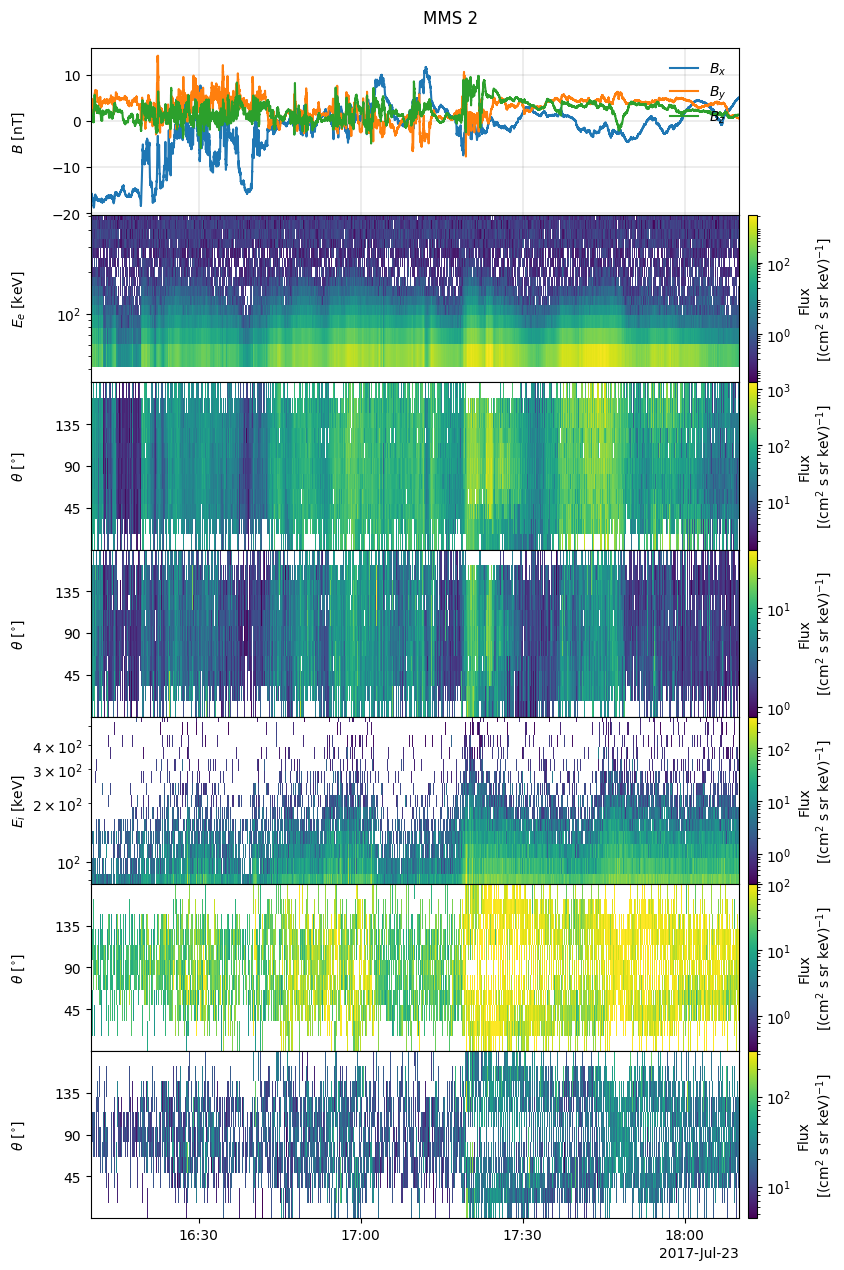

In [13]:
f, axs = plt.subplots(7, sharex="all", figsize=(9, 13))
f.subplots_adjust(hspace=0, left=0.1, right=0.82, bottom=0.05, top=0.95)

plot_line(axs[0], b_gsm)
axs[0].legend(
    ["$B_x$", "$B_y$", "$B_z$"],
    loc="upper right",
    frameon=False,
    bbox_to_anchor=(1.0, 1.0),
)
axs[0].set_ylabel("$B$ [nT]")

axs[1], caxs1 = plot_spectr(axs[1], dpf_feeps_omni_e, yscale="log", cscale="log")
caxs1.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[1].set_ylabel("$E_e$ [keV]")

axs[2], caxs2 = plot_spectr(axs[2], dpf_feeps_pad_e_050_100, cscale="log")
caxs2.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[2].set_ylim([0, 180])
axs[2].set_yticks([45, 90, 135])
axs[2].set_ylabel("$\\theta$ [$^{\\circ}$]")

axs[3], caxs3 = plot_spectr(axs[3], dpf_feeps_pad_e_100_200, cscale="log")
caxs3.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[3].set_ylim([0, 180])
axs[3].set_yticks([45, 90, 135])
axs[3].set_ylabel("$\\theta$ [$^{\\circ}$]")

axs[4], caxs4 = plot_spectr(axs[4], dpf_feeps_omni_i[:, 1:], yscale="log", cscale="log")
caxs4.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[4].set_ylabel("$E_i$ [keV]")

axs[5], caxs5 = plot_spectr(
    axs[5], dpf_feeps_pad_i_070_100, cscale="log", clim=[3e-1, 1e2]
)
caxs5.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[5].set_ylim([0, 180])
axs[5].set_yticks([45, 90, 135])
axs[5].set_ylabel("$\\theta$ [$^{\\circ}$]")

axs[6], caxs6 = plot_spectr(axs[6], dpf_feeps_pad_i_100_200, cscale="log")
caxs6.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[6].set_ylim([0, 180])
axs[6].set_yticks([45, 90, 135])
axs[6].set_ylabel("$\\theta$ [$^{\\circ}$]")

f.align_ylabels(axs)
f.suptitle(f"MMS {mms_id:d}")

### Spin average omni-directional differential particle flux and pitch angle distributions

In [14]:
# Electron
dpf_feeps_omni_e_spin = mms.feeps_spin_avg(
    dpf_feeps_omni_e, dpf_feeps_alle_e.spinsectnum
)

# Ion
dpf_feeps_omni_i_spin = mms.feeps_spin_avg(
    dpf_feeps_omni_i, dpf_feeps_alle_i.spinsectnum
)

In [15]:
# Electron
dpf_feeps_pad_e_050_100_spin = mms.feeps_pad_spinavg(
    dpf_feeps_pad_e_050_100, dpf_feeps_alle_e.spinsectnum
)
dpf_feeps_pad_e_100_200_spin = mms.feeps_pad_spinavg(
    dpf_feeps_pad_e_100_200, dpf_feeps_alle_e.spinsectnum
)

# Ion
dpf_feeps_pad_i_070_100_spin = mms.feeps_pad_spinavg(
    dpf_feeps_pad_i_070_100, dpf_feeps_alle_i.spinsectnum
)
dpf_feeps_pad_i_100_200_spin = mms.feeps_pad_spinavg(
    dpf_feeps_pad_i_100_200, dpf_feeps_alle_i.spinsectnum
)

### Plot

Text(0.5, 0.98, 'MMS 2 spin averaged')

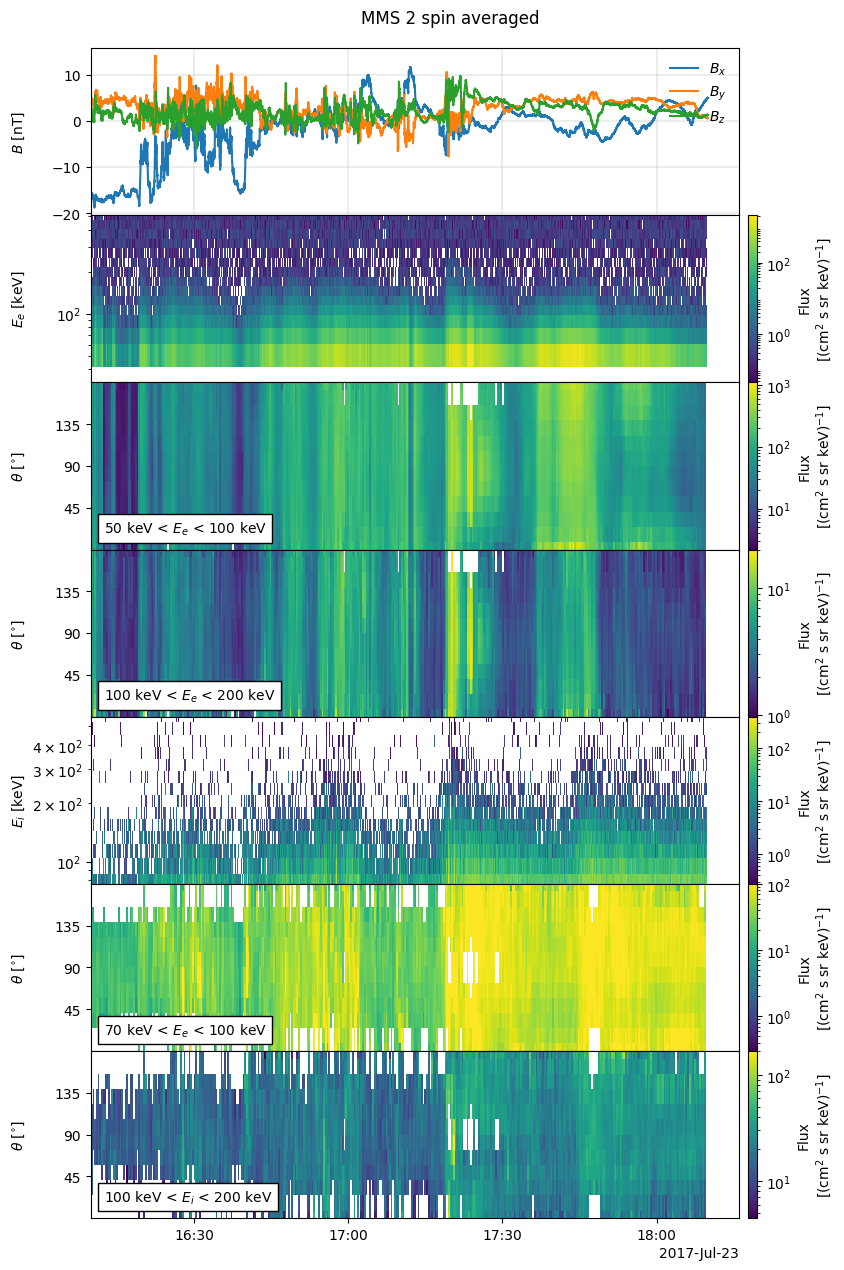

In [16]:
f, axs = plt.subplots(7, sharex="all", figsize=(9, 13))
f.subplots_adjust(hspace=0, left=0.1, right=0.82, bottom=0.05, top=0.95)

plot_line(axs[0], b_gsm)
axs[0].legend(
    ["$B_x$", "$B_y$", "$B_z$"],
    loc="upper right",
    frameon=False,
    bbox_to_anchor=(1.0, 1.0),
)
axs[0].set_ylabel("$B$ [nT]")

axs[1], caxs1 = plot_spectr(axs[1], dpf_feeps_omni_e_spin, yscale="log", cscale="log")
caxs1.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[1].set_ylabel("$E_e$ [keV]")

axs[2], caxs2 = plot_spectr(axs[2], dpf_feeps_pad_e_050_100_spin, cscale="log")
caxs2.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[2].set_ylim([0, 180])
axs[2].set_yticks([45, 90, 135])
axs[2].set_ylabel("$\\theta$ [$^{\\circ}$]")
axs[2].text(
    0.02,
    0.1,
    "50 keV < $E_e$ < 100 keV",
    bbox=dict(fc=(1, 1, 1)),
    transform=axs[2].transAxes,
)

axs[3], caxs3 = plot_spectr(axs[3], dpf_feeps_pad_e_100_200_spin, cscale="log")
caxs3.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[3].set_ylim([0, 180])
axs[3].set_yticks([45, 90, 135])
axs[3].set_ylabel("$\\theta$ [$^{\\circ}$]")
axs[3].text(
    0.02,
    0.1,
    "100 keV < $E_e$ < 200 keV",
    bbox=dict(fc=(1, 1, 1)),
    transform=axs[3].transAxes,
)

axs[4], caxs4 = plot_spectr(
    axs[4], dpf_feeps_omni_i_spin[:, 1:], yscale="log", cscale="log"
)
caxs4.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[4].set_ylabel("$E_i$ [keV]")

axs[5], caxs5 = plot_spectr(
    axs[5], dpf_feeps_pad_i_070_100_spin, cscale="log", clim=[3e-1, 1e2]
)
caxs5.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[5].set_ylim([0, 180])
axs[5].set_yticks([45, 90, 135])
axs[5].set_ylabel("$\\theta$ [$^{\\circ}$]")
axs[5].text(
    0.02,
    0.1,
    "70 keV < $E_e$ < 100 keV",
    bbox=dict(fc=(1, 1, 1)),
    transform=axs[5].transAxes,
)

axs[6], caxs6 = plot_spectr(axs[6], dpf_feeps_pad_i_100_200_spin, cscale="log")
caxs6.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[6].set_ylim([0, 180])
axs[6].set_yticks([45, 90, 135])
axs[6].set_ylabel("$\\theta$ [$^{\\circ}$]")
axs[6].text(
    0.02,
    0.1,
    "100 keV < $E_i$ < 200 keV",
    bbox=dict(fc=(1, 1, 1)),
    transform=axs[6].transAxes,
)

f.align_ylabels(axs)
f.suptitle(f"MMS {mms_id:d} spin averaged")